In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install joypy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from joypy import joyplot #!pip install joypy

# Visualize Multiple Distributions
- Box plot
- Violin plot
- Strip chart
- Ridgeline plot

Book, Chapter 9: Fundamentals of Data Visualization by Claus O. Wilke

Data: https://data.gov.in/

In [4]:
filepath="/content/drive/MyDrive/Data Science/data/Class-3/daily_vegetable_prices_india.csv"
data=pd.read_csv(filepath)
print(data)

               state            district             market     commodity  \
0     Andhra Pradesh             Chittor           Kalikiri        Tomato   
1     Andhra Pradesh             Chittor    Mulakalacheruvu        Tomato   
2     Andhra Pradesh             Chittor         Vayalapadu        Tomato   
3     Andhra Pradesh       East Godavari        Ravulapelem        Banana   
4     Andhra Pradesh       East Godavari        Ravulapelem        Banana   
...              ...                 ...                ...           ...   
2376     West Bengal  Sounth 24 Parganas  Baruipur(Canning)  Green Chilli   
2377     West Bengal  Sounth 24 Parganas  Baruipur(Canning)         Guava   
2378     West Bengal  Sounth 24 Parganas  Baruipur(Canning)         Onion   
2379     West Bengal  Sounth 24 Parganas  Baruipur(Canning)          Rice   
2380     West Bengal  Sounth 24 Parganas  Baruipur(Canning)          Rice   

                variety arrival_date  min_price  max_price  modal_price  
0

In [5]:
data_commodity=data.pivot_table(values=["min_price","max_price"],columns=["commodity"],index=["state"],aggfunc="mean")
print(data_commodity)

                     max_price                                            \
commodity           Amaranthus Amla(Nelli Kai) Amphophalus         Apple   
state                                                                      
Andhra Pradesh             NaN             NaN         NaN           NaN   
Bihar                      NaN             NaN         NaN           NaN   
Chandigarh                 NaN             NaN         NaN           NaN   
Chattisgarh                NaN             NaN         NaN  10000.000000   
Gujarat                    NaN             NaN         NaN           NaN   
Haryana                    NaN             NaN         NaN   7632.727273   
Himachal Pradesh           NaN             NaN         NaN   9000.000000   
Jammu and Kashmir          NaN             NaN         NaN   6500.000000   
Jharkhand                  NaN             NaN         NaN           NaN   
Karnataka                  NaN             NaN         NaN           NaN   
Kerala      

In [7]:
data_commodity1=data_commodity.stack(level=0)
print(data_commodity1)

commodity                     Amaranthus  Amla(Nelli Kai)  Amphophalus  \
state                                                                    
Andhra Pradesh    max_price          NaN              NaN          NaN   
                  min_price          NaN              NaN          NaN   
Bihar             max_price          NaN              NaN          NaN   
                  min_price          NaN              NaN          NaN   
Chandigarh        max_price          NaN              NaN          NaN   
                  min_price          NaN              NaN          NaN   
Chattisgarh       max_price          NaN              NaN          NaN   
                  min_price          NaN              NaN          NaN   
Gujarat           max_price          NaN              NaN          NaN   
                  min_price          NaN              NaN          NaN   
Haryana           max_price          NaN              NaN          NaN   
                  min_price          N

In [8]:
data_commodity2=data_commodity1.unstack()
print(data_commodity2)

commodity           Amaranthus              Amla(Nelli Kai)            \
                     max_price    min_price       max_price min_price   
state                                                                   
Andhra Pradesh             NaN          NaN             NaN       NaN   
Bihar                      NaN          NaN             NaN       NaN   
Chandigarh                 NaN          NaN             NaN       NaN   
Chattisgarh                NaN          NaN             NaN       NaN   
Gujarat                    NaN          NaN             NaN       NaN   
Haryana                    NaN          NaN             NaN       NaN   
Himachal Pradesh           NaN          NaN             NaN       NaN   
Jammu and Kashmir          NaN          NaN             NaN       NaN   
Jharkhand                  NaN          NaN             NaN       NaN   
Karnataka                  NaN          NaN             NaN       NaN   
Kerala             3871.428571  3135.714286        

# Pandas API Guide
For various operations in data frame, get the guide from 
https://pandas.pydata.org/docs/reference/index.html

In [13]:
max_price=data_commodity["max_price"]

column_means = max_price.mean()
#print(column_means)
max_price=max_price.fillna(column_means)
max_price=max_price[["Tomato","Potato","Banana","Onion","Cabbage"]]
print(max_price)

commodity               Tomato       Potato       Banana        Onion  \
state                                                                   
Andhra Pradesh     1550.000000  1548.111336  1310.000000  4000.000000   
Bihar              1858.871218  1548.111336  2240.878205  2704.137426   
Chandigarh         1600.000000   600.000000  2240.878205  2600.000000   
Chattisgarh         800.000000  1500.000000  2240.878205  2500.000000   
Gujarat            1687.500000  1225.000000  2240.878205  2600.000000   
Haryana            1707.142857  1030.000000  2137.500000  2435.714286   
Himachal Pradesh   1858.871218  1548.111336  2240.878205  2704.137426   
Jammu and Kashmir  2600.000000  1425.000000  2666.666667  2866.666667   
Jharkhand          1858.871218  1548.111336  2240.878205  2704.137426   
Karnataka          1550.000000  2200.000000  2240.878205  3000.000000   
Kerala             4157.142857  3833.333333  4169.230769  4637.500000   
Madhya Pradesh      900.000000  1000.000000  2240.8

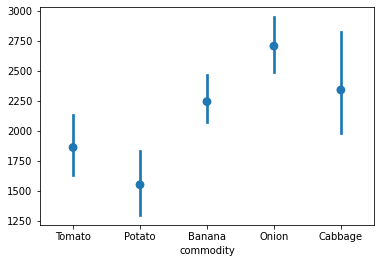

In [14]:
sns.pointplot(data=max_price, join=False)#, dodge=True)

                     max_price    min_price
state                                      
Andhra Pradesh     1550.000000   760.000000
Chandigarh         1600.000000   400.000000
Chattisgarh         800.000000   700.000000
Gujarat            1687.500000  1275.000000
Haryana            1707.142857  1142.857143
Jammu and Kashmir  2600.000000  2400.000000
Karnataka          1550.000000  1175.000000
Kerala             4157.142857  3785.714286
Madhya Pradesh      900.000000   450.000000
Meghalaya          3000.000000  2500.000000
Odisha             1833.333333  1333.333333
Punjab             2193.066667  1850.000000
Rajasthan          1700.000000  1156.000000
Telangana          1900.000000  1480.000000
Uttar Pradesh      1262.625000  1112.250000
Uttrakhand         1350.000000  1000.000000
West Bengal        1810.000000  1692.000000


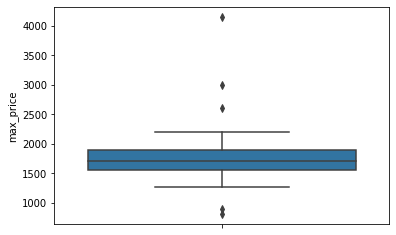

In [19]:
tomato_price=data_commodity2["Tomato"]
tomato_price=tomato_price.dropna()
print(tomato_price)
#tomato_price=tomato_price.fillna(tomato_price.mean())
# Box plot
sns.boxplot(y=tomato_price["max_price"])

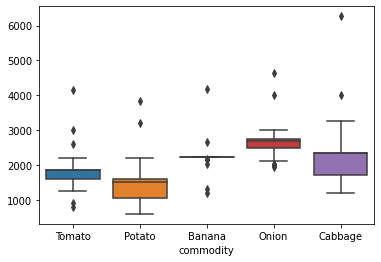

In [17]:
sns.boxplot(data=max_price)

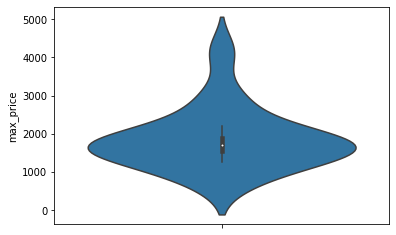

In [18]:
sns.violinplot(y=tomato_price["max_price"])

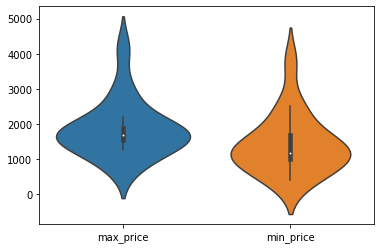

In [20]:
sns.violinplot(data=tomato_price)

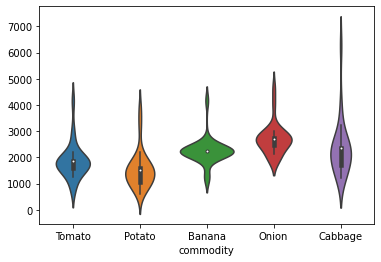

In [21]:
sns.violinplot(data=max_price)

Text(0, 0.5, 'Maximum Price')

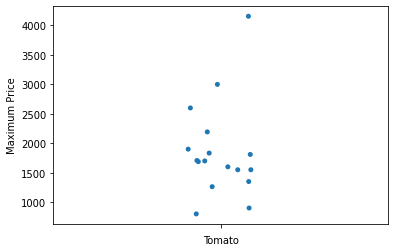

In [23]:
ax=sns.stripplot(y=tomato_price["max_price"])
ax.set_xlabel("Tomato")
ax.set_ylabel("Maximum Price")

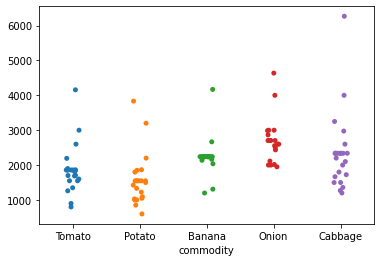

In [24]:
sns.stripplot(data=max_price)

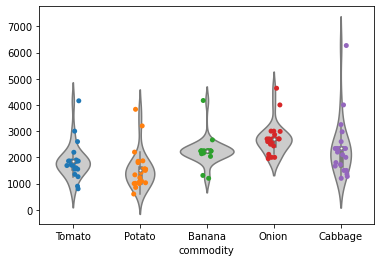

In [25]:
ax=sns.stripplot(data=max_price)
ax=sns.violinplot(data=max_price,color="0.8")

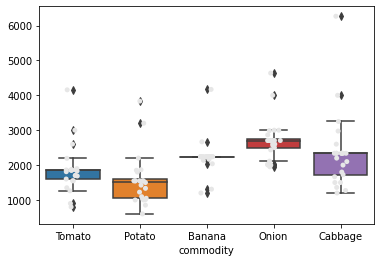

In [26]:
ax=sns.boxplot(data=max_price)
ax=sns.stripplot(data=max_price,color="0.9")

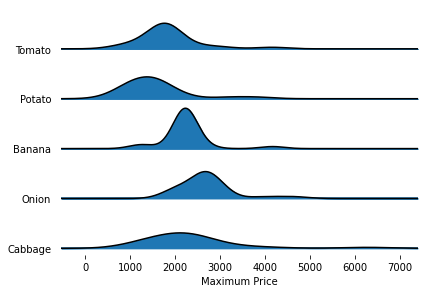

In [28]:
# Ridgeline plot
joyplot(max_price,overlap = 0)
plt.xlabel("Maximum Price")
plt.show()

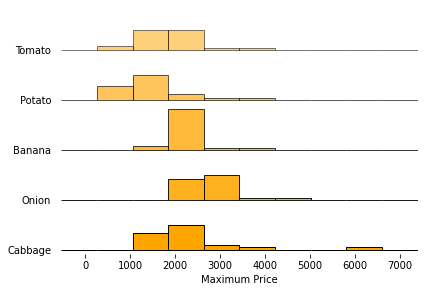

In [29]:
joyplot(max_price,hist=True,bins=10,color = 'Orange', fade = True,overlap = 0)
plt.xlabel("Maximum Price")

plt.show()

In [32]:
split_data=data[data["commodity"].isin(["Tomato","Potato","Banana","Onion","Cabbage"])]
print(split_data)

               state            district             market commodity  \
0     Andhra Pradesh             Chittor           Kalikiri    Tomato   
1     Andhra Pradesh             Chittor    Mulakalacheruvu    Tomato   
2     Andhra Pradesh             Chittor         Vayalapadu    Tomato   
3     Andhra Pradesh       East Godavari        Ravulapelem    Banana   
4     Andhra Pradesh       East Godavari        Ravulapelem    Banana   
...              ...                 ...                ...       ...   
2364     West Bengal          Jalpaiguri   Jalpaiguri Sadar    Tomato   
2369     West Bengal          Jalpaiguri          Moynaguri     Onion   
2370     West Bengal          Jalpaiguri          Moynaguri    Potato   
2374     West Bengal  Sounth 24 Parganas  Baruipur(Canning)   Cabbage   
2378     West Bengal  Sounth 24 Parganas  Baruipur(Canning)     Onion   

                variety arrival_date  min_price  max_price  modal_price  
0                 Local   25/01/2022        700  

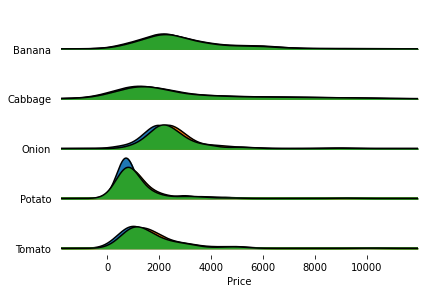

In [33]:
joyplot(split_data,by="commodity",overlap = 0)
plt.xlabel("Price")
plt.show()

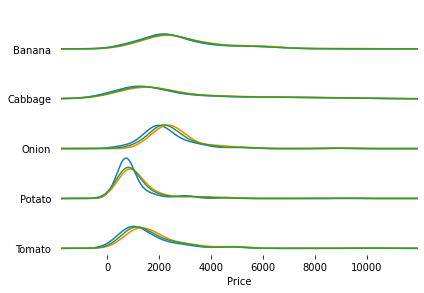

In [34]:
joyplot(split_data,by="commodity",overlap = 0,fill=False)
plt.xlabel("Price")
plt.show()